# Lab 6

In [361]:
import networkx as nx
from networkx.algorithms import node_classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [362]:
G = nx.path_graph(4)
gpos = nx.spectral_layout(G)

G.edges()

EdgeView([(0, 1), (1, 2), (2, 3)])

In [363]:
G.nodes

NodeView((0, 1, 2, 3))

In [364]:
G.node[0]['label'] = 'blue'
G.node[3]['label'] = 'red'

node_color = [G.node[n]['label'] if 'label' in G.node[n] else 'black' for n in G.nodes]
node_color

['blue', 'black', 'black', 'red']

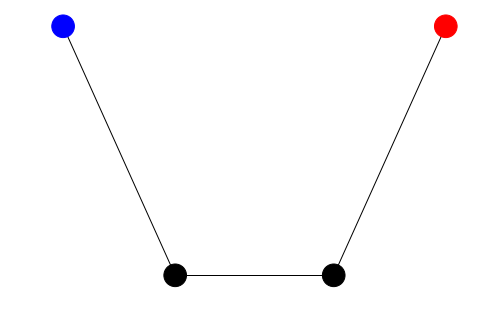

In [365]:
nx.draw(G, gpos, with_labels=False, node_size=512, node_color=node_color)

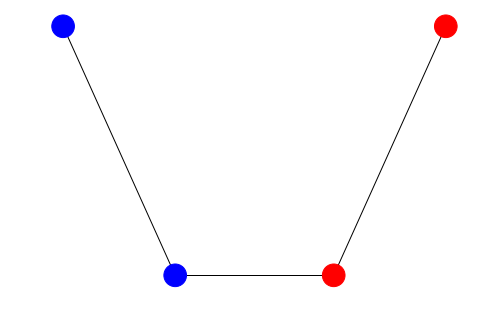

In [366]:
nx.draw(G,gpos, with_labels=False, node_size=512, node_color=node_classification.harmonic_function(G))

In [367]:
G = nx.karate_club_graph()

In [368]:
colored_clubs = ['red' if G.nodes[n]['club'] == 'Officer' else 'blue' for n in G.nodes]

In [369]:
gpos = nx.spring_layout(G, iterations=200)

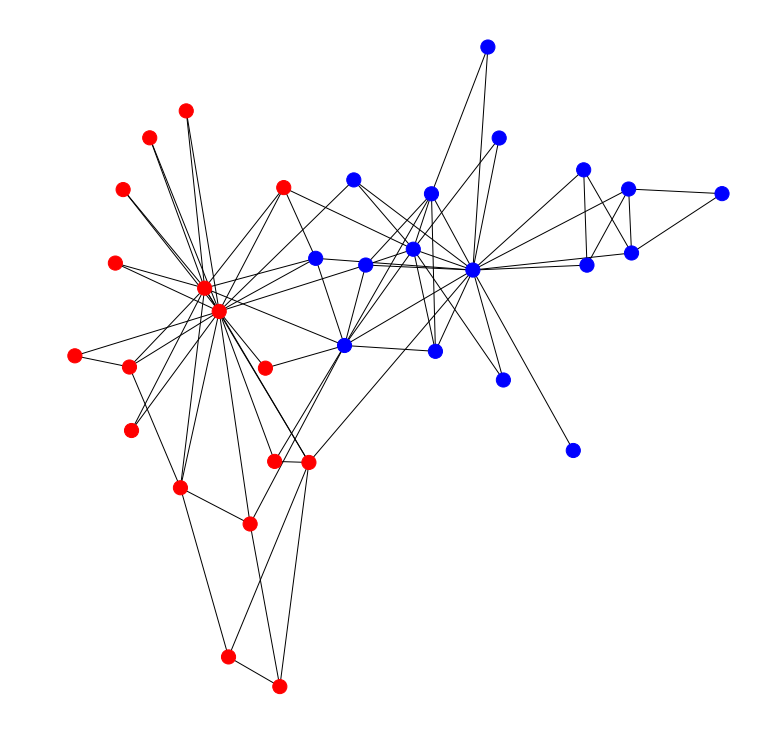

In [370]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [371]:
label_removed = set([0, 1, 2, 3, 4, 5, 6, 7])
for i in label_removed:
    del G.node[i]['club']

In [372]:
G.node[8]['club']

'Mr. Hi'

In [373]:
colored_clubs = [
    'red' if 'club' in G.node[n] and G.node[n]['club'] == 'Officer' 
    else 'blue' if 'club' in G.node[n] and G.node[n]['club'] == 'Mr. Hi' 
    else 'gray' for n in G.nodes
]

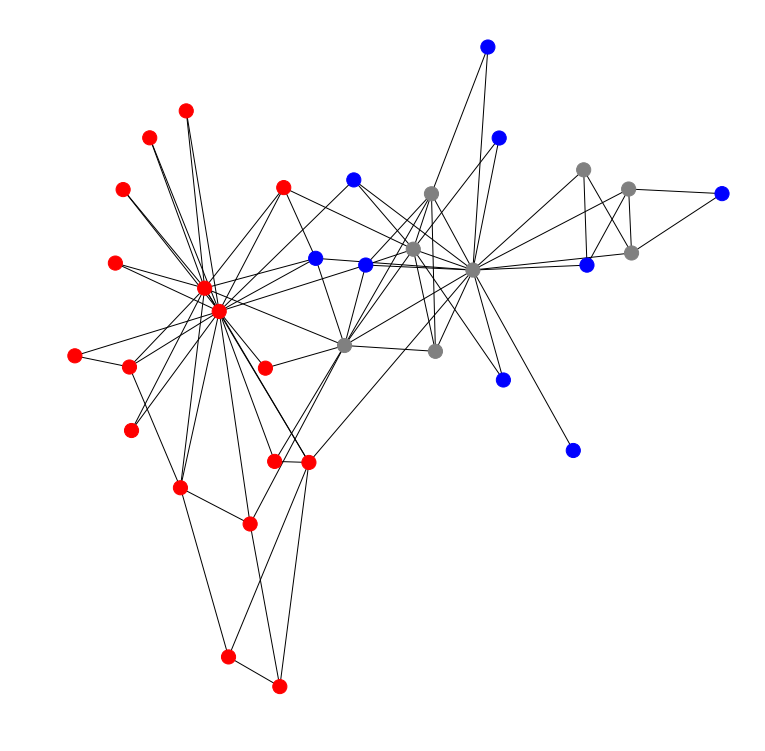

In [374]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=colored_clubs)
plt.show()

In [375]:
from nose.tools import *

predicted = node_classification.harmonic_function(G, label_name='club')
label_not_removed = set(list(range(len(G)))) - label_removed
for i in label_not_removed:
    print(predicted[i], G.node[i]['club'])
    assert_equal(predicted[i], G.node[i]['club'])

Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Mr. Hi Mr. Hi
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Mr. Hi Mr. Hi
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer
Officer Officer


# Graded Part


In [376]:
def create_toroidal(k):
    G=nx.Graph()
    count = 0
    mapping1 = {}
    mapping2 = {}
    for i in range(k):
        for j in range(k):
            mapping1[count] = (i,j)
            mapping2[(i,j)] = count
            G.add_node(count)
            count +=1
    for i in range(k):
        for j in range(k):
            if (i,j+1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j+1])
            if (i,j-1) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i,j-1])
            if (i+1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i+1,j])
            if (i-1,j) in mapping2:
                G.add_edge(mapping2[(i,j)],mapping2[i-1,j])  
    j = 0
    for i in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i,j+k-1])
    i = 0
    for j in range(k):
        G.add_edge(mapping2[(i,j)],mapping2[i+k-1,j])
    return G

In [377]:
G = create_toroidal(16)  
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [378]:
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]

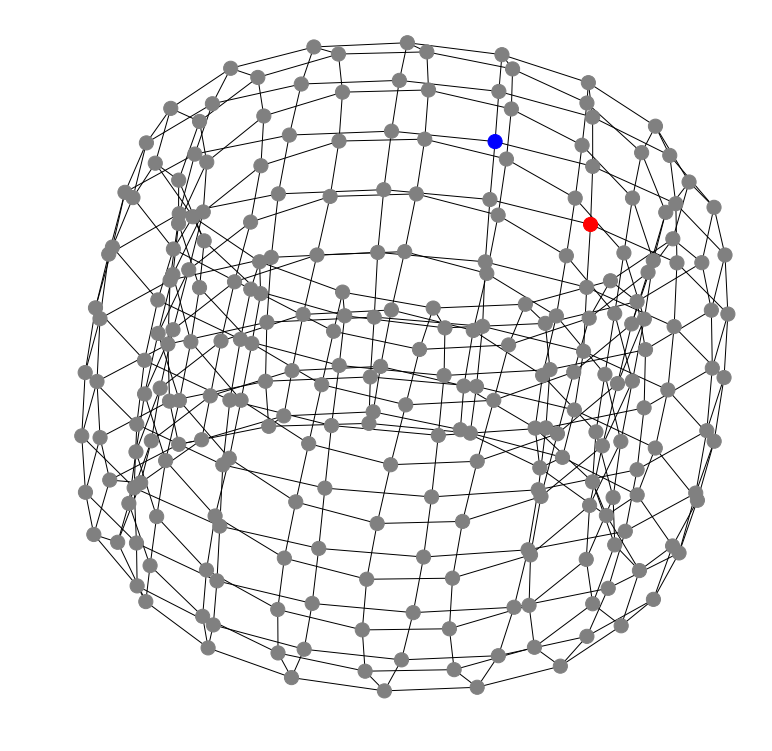

In [379]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [387]:
node_color=node_classification.harmonic_function(G)

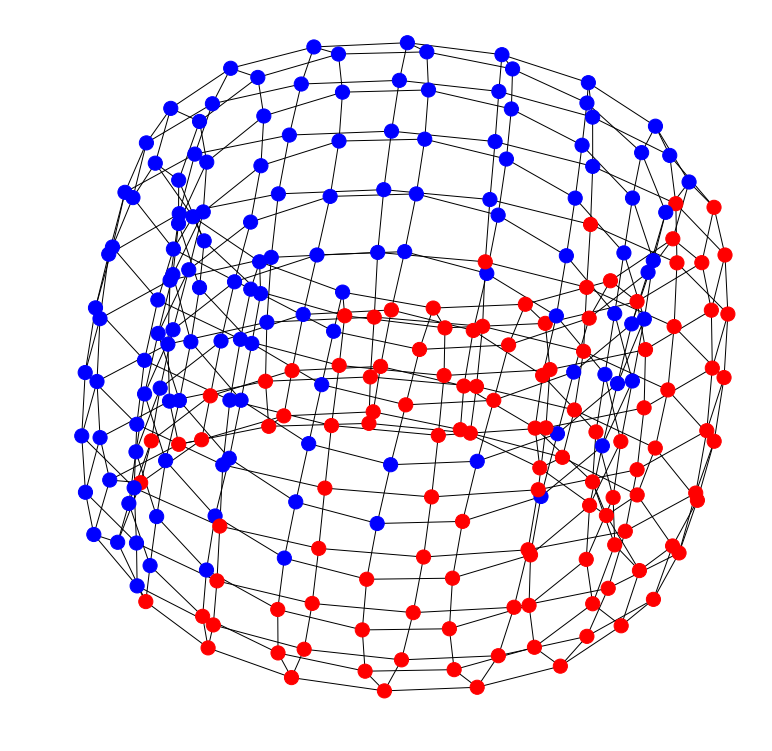

In [388]:
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [389]:
print(node_color)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 're

In [390]:
removed = [n for n in G.nodes if n%3 == 0 ]
for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]

In [391]:
print(G.node[1])
print(G.node[2])
print(G.node[3])
print(G.node[4])
print(G.node[252])
print(G.node[253])
print(G.node[254])
print(G.node[255])

{'label': 'blue'}
{'label': 'blue'}
{}
{'label': 'blue'}
{}
{'label': 'red'}
{'label': 'red'}
{'label': 'red'}


In [392]:
predicted = node_classification.harmonic_function(G, label_name='label')

In [393]:
print(predicted)

['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'r

In [394]:
for i in range(len(node_color)):
    print(predicted[i], node_color[i])
    assert_equal(predicted[i], node_color[i])

blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
red red
red red
red red
red red
red red
red red
red red
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue blue
blue red


AssertionError: 'blue' != 'red'
- blue
+ red


In [395]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [396]:
confusion_matrix(node_color, predicted)

array([[136,   0],
       [  2, 118]], dtype=int64)

In [397]:
precision_recall_fscore_support(node_color, predicted)

(array([0.98550725, 1.        ]),
 array([1.        , 0.98333333]),
 array([0.99270073, 0.99159664]),
 array([136, 120], dtype=int64))

# Harmonic function implementation

In [399]:
def your_harmonic_function(Graph, label_name):
    n_nodes = len(Graph.nodes)
    sigma = 0.3

    dist = np.zeros((n_nodes,n_nodes))
    W = np.zeros((n_nodes,n_nodes))
    D = np.zeros((n_nodes,n_nodes))

    for edge in Graph.edges:
        #In case if we want to havea custom distance measure
        dist[edge[0],edge[1]] = 1.0
        dist[edge[1],edge[0]] = 1.0

        W[edge[0],edge[1]] = np.exp(-dist[edge[0],edge[1]]**2/(sigma**2))
        W[edge[1],edge[0]] = np.exp(-dist[edge[0],edge[1]]**2/(sigma**2))

    #D is a diagonal matrix with entries equal to the sum of each row
    for i in range(n_nodes):
        D[i,i]=sum(W[i])

    P = np.linalg.inv(D).dot(W)

    labeled = []
    unlabeled = []

    #Labeled datapoints: 1 for blue 0 for red
    fl = []
    
    #Build labeled and unlabeled indices so thet we can slice the original W, D and P matrices
    for n in range(n_nodes):
        if label_name in Graph.node[n].keys():
            labeled.append(n)
            fl.append(0.0 if Graph.node[n][label_name]=="red" else 1.0)
        else:
            unlabeled.append(n)

    #Get P slices for P fu(unlabeled) predictions
    Puu = P[unlabeled][:,unlabeled]
    Pul = P[unlabeled][:,labeled]
    
    #fu = (I-Puu)^-1*Pul*fl
    fu = np.linalg.inv(np.identity(Puu.shape[0])-Puu).dot(Pul.dot(fl))
    fvals = np.zeros(shape=(n_nodes))
    
    #Fill final result matrix with labeled data values
    for i in range(n_nodes):
        if i in labeled:
            fvals[i] =  1 if G.nodes[i][label_name]=="blue" else 0
    #And unlabeled data preditions using indices
    fvals[unlabeled] = fu
    
    #Final prediction string are assigned using a threshold
    labeled_list  = ["blue" if label>=0.5 else "red" for label in fvals]
    return labeled_list

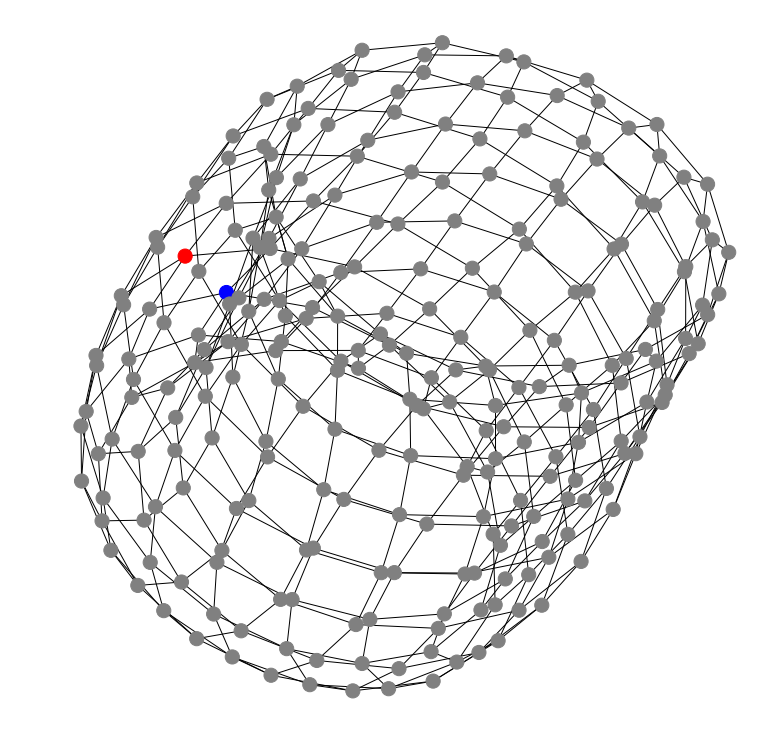

In [400]:
G = create_toroidal(16)  
G.node[0]['label'] = 'blue'
G.node[255]['label'] = 'red'
gpos = nx.spring_layout(G, iterations=200)
node_color=['blue' if n == 0 else 'red' if n == 255 else 'gray' for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=node_color)
plt.show()

In [409]:
node_color=node_classification.harmonic_function(G)
removed = [n for n in G.nodes if n%3 == 0 ]

for n in G.nodes:
    if n not in removed:
        G.node[n]['label'] = node_color[n]
predicted = your_harmonic_function(G, label_name='label')

confusion_matrix(node_color, predicted)
precision_recall_fscore_support(node_color, predicted)

(array([1., 1.]),
 array([1., 1.]),
 array([1., 1.]),
 array([138, 118], dtype=int64))

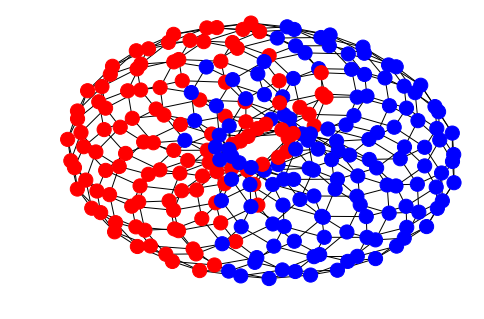

In [410]:
gpos = nx.spring_layout(G, iterations=200)
nx.draw(G, gpos, with_labels=False, node_size=200, node_color=predicted)